<a href="https://colab.research.google.com/github/MiguelFid/Master-s-degree-Final-Project/blob/main/TFMMiguelFidalgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Desarrollo y evaluación de modelos de
aprendizaje automático para la
predicción de enfermedades cardiovasculares**

In [ ]:
# Se cargan las librerías con las que se trabajará en el visualizado de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargamos el dataset de los datos a visualizar
df = pd.read_csv ("heart.csv")

# Se procede a la exploración del dataset

# Filas y columnas
print ("Número de filas y columnas")
print (df.shape)
print ("\n Nombre de las columnas")
print (df.columns)

# Exploración de los datos
print ("\n Exploración de los datos")
pd.set_option ("Display.max_columns", None)
print (df)

# Primeras 10 filas aisladas
print ("\n Primeras 10 filas aisladas:")
print (df.head(10))

# Últimas 10 filas aisaldas
print ("\n Últimas 10 filas aisladas")
print (df.tail(10))

# Datos descriptivos
print("\n Descripción del dataset")
print (df.describe())

# Valores NaNs y su número
nans = df.isnull().values.any()
print ("\n Existencia y número de NaN")
print (nans)

# Se observan las columnas en grupos de 4
print ("\n Se observan las columnas en grupos de 4")
print (df[['age','sex','cp','trestbps']])
print (df[['chol','fbs','restecg','thalach']])
print (df[['exang','oldpeak','slope','ca']])
print (df[['thal','num']])

Número de filas y columnas
(303, 14)

 Nombre de las columnas
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

 Exploración de los datos
      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0   

In [ ]:
# Se cargan librerías para la visualización mas sencilla de los datos
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# Se visualiza gráficamente el conjunto de datos
"""Para visualizar de mejor forma la base de datos es necesario crear un
nuevo DataFrame con la variable 'diagnostico' """
# Para ello se hace una copia del DataFrame y se crea la variable 'dianostico
df_bi = df.copy()
df_bi['diagnostico'] = df_bi['num'].apply(lambda x: 1 if x > 0 else 0)

# Para finalizar es necesario filtrar los valores que no sean igual a 0
enfermedad_all = df_bi[df_bi['diagnostico'] != 0]['diagnostico']

# Para representar el gráfico es necesario realizar el contaje
num_binario = df_bi['diagnostico'].value_counts()

#Se observa el nuevo dataset binario
# Primeras 10 filas aisladas
print ("\n Primeras 10 filas aisladas:")
print (df_bi.head(10))

# Últimas 10 filas aisladas
print ("\n Últimas 10 filas aisladas:")
print (df_bi.tail(10))

# Datos descriptivos
print("\n Descripción del dataset")
print (df_bi.describe())

# Ajuste de los gráficos
fig = make_subplots(rows=1, cols=2, subplot_titles=('Diagnostico', 'Diagnostico'))

# Gráfico de barras Diagnostico vs Sano
fig.add_trace(go.Bar(x=num_binario.index, y=num_binario.values, marker=dict(color='green'), name='Diagnostico vs Sano'), row=1, col=1)
fig.update_xaxes(title_text='Diagnostico', row=1, col=1)
fig.update_yaxes(title_text='Número de instancias', row=1, col=1)

# Gráfico de barras Sano vs Num_Tipo
fig.add_trace(go.Bar(x=['Sano', 'Num 1', 'Num 2', 'Num 3', 'Num 4'], y=df_bi['num'].value_counts(), marker=dict(color='darkred'), name='Sano vs Num_Tipo'), row=1, col=2)
fig.update_xaxes(title_text='Num', row=1, col=2)
fig.update_yaxes(title_text='Número de instancias', row=1, col=2)

fig.update_layout(showlegend=True, title_text="Gráficos de barras", barmode='group')
fig.show()


 Primeras 10 filas aisladas:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
5  56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8   
6  62.0  0.0  4.0     140.0  268.0  0.0      2.0    160.0    0.0      3.6   
7  57.0  0.0  4.0     120.0  354.0  0.0      0.0    163.0    1.0      0.6   
8  63.0  1.0  4.0     130.0  254.0  0.0      2.0    147.0    0.0      1.4   
9  53.0  1.0  4.0     140.0  203.0  1.0      2.0    155.0    1.0      3.1   

   slope   ca  thal  num  diagnostico  
0    3.0  0.0   6.0    0            0  
1    2.0  3.0   3.0    2            1  
2 

Visualiación de la realción de las variables


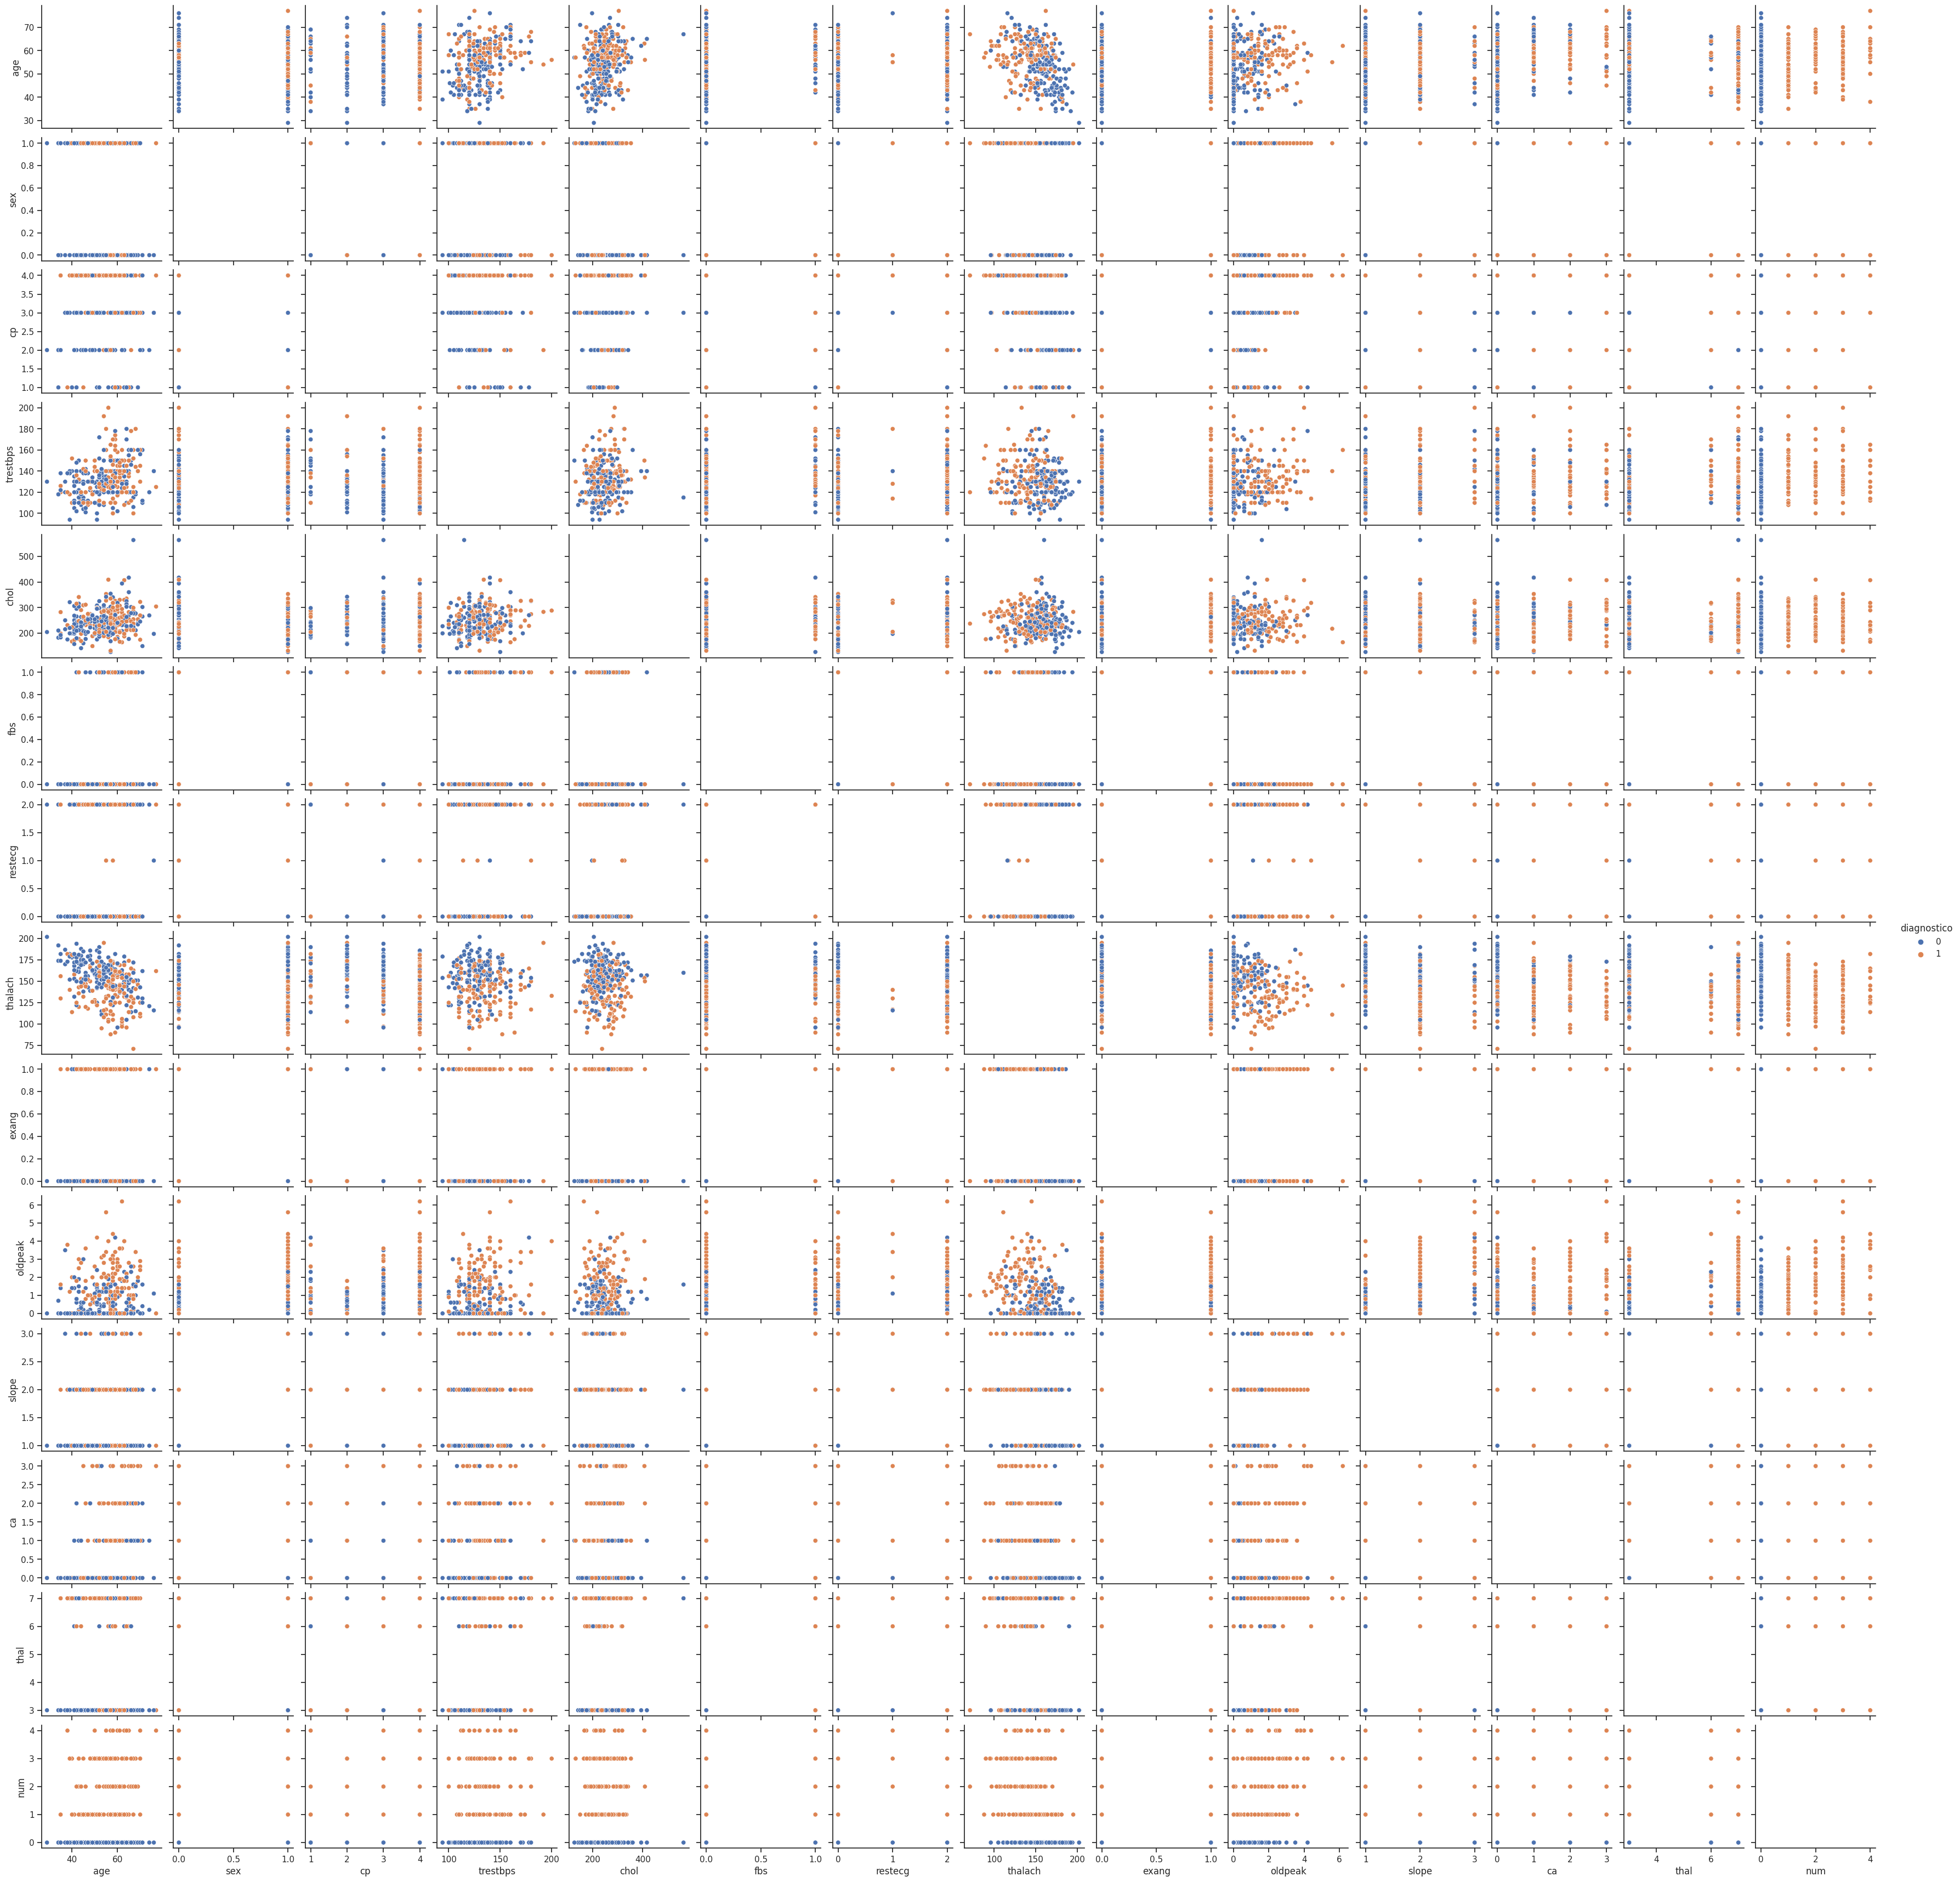

In [ ]:
# Visualización de las variables
print ("Visualiación de la realción de las variables")
sns.set(style="ticks")
sns.pairplot(df_bi, hue='diagnostico', diag_kind="bright")

In [ ]:
# Se continua la visualización de los datos
# Se prefedinen los valores de la variable 'diagnostico'
df['diagnostico'] = df.apply(lambda x: "Sano" if x['num'] == 0 else "Enfermo", axis=1)

# Se dividen los valores de 'diagnostico': Sano' y 'Enfermo'
df_sano = df[df['diagnostico'] == 'Sano']
df_enfermo = df[df['diagnostico'] == 'Enfermo']
# Se realizan y visualizan los gráficos de algunas variables dos a dos
# Configuración de los subgráficos
fig = make_subplots(rows=2, cols=2, subplot_titles=('Edad vs Presión en reposo', 'Edad vs Colesterol', 'Edad vs Pulso máximo', 'Edad vs St causada por Ej'),
                    vertical_spacing=0.2, row_heights=[0.5, 0.5])

# Gráfico 1: Edad vs Presión en reposo
fig.add_trace(go.Scatter(x=df_sano['age'], y=df_sano['trestbps'], mode='markers', marker=dict(color="blue"), name='Sano',
                         marker_size=10, showlegend=False), row=1, col=1)

fig.add_trace(go.Scatter(x=df_enfermo['age'], y=df_enfermo['trestbps'], mode='markers', marker=dict(color="red"), name='Enfermo',
                         marker_size=10, showlegend=False), row=1, col=1)

# Gráfico 2: Edad vs Colesterol
fig.add_trace(go.Scatter(x=df_sano['age'], y=df_sano['chol'], mode='markers', marker=dict(color="blue"), name='Sano',
                         marker_size=10, showlegend=False), row=1, col=2)

fig.add_trace(go.Scatter(x=df_enfermo['age'], y=df_enfermo['chol'], mode='markers', marker=dict(color="red"), name='Enfermo',
                         marker_size=10, showlegend=False), row=1, col=2)

# Gráfico 3: Edad vs Pulso máximo
fig.add_trace(go.Scatter(x=df_sano['age'], y=df_sano['thalach'], mode='markers', marker=dict(color="blue"), name='Sano',
                         marker_size=10, showlegend=False), row=2, col=1)

fig.add_trace(go.Scatter(x=df_enfermo['age'], y=df_enfermo['thalach'], mode='markers', marker=dict(color="red"), name='Enfermo',
                         marker_size=10, showlegend=False), row=2, col=1)

# Gráfico 4: Edad vs St causada por Ej
fig.add_trace(go.Scatter(x=df_sano['age'], y=df_sano['oldpeak'], mode='markers', marker=dict(color="blue"), name='Sano',
                         marker_size=10, showlegend=False), row=2, col=2)

fig.add_trace(go.Scatter(x=df_enfermo['age'], y=df_enfermo['oldpeak'], mode='markers', marker=dict(color="red"), name='Enfermo',
                         marker_size=10, showlegend=False), row=2, col=2)

# Se crean leyendas personalizadas
fig.add_annotation(dict(font=dict(color="blue", size=14), x=0.0, y=-0.1, showarrow=False,
                        text="Sano",
                        xref="paper",
                        yref="paper"))

fig.add_annotation(dict(font=dict(color="red", size=14), x=0.0, y=-0.15, showarrow=False,
                        text="Enfermo",
                        xref="paper",
                        yref="paper"))

# Títulos de los ejes
fig.update_xaxes(title_text="Edad", row=1, col=1)
fig.update_yaxes(title_text="Presión en reposo", row=1, col=1)
fig.update_xaxes(title_text="Edad", row=1, col=2)
fig.update_yaxes(title_text="Colesterol", row=1, col=2)
fig.update_xaxes(title_text="Edad", row=2, col=1)
fig.update_yaxes(title_text="Pulso máximo", row=2, col=1)
fig.update_xaxes(title_text="Edad", row=2, col=2)
fig.update_yaxes(title_text="St causada por Ej", row=2, col=2)

fig.update_layout(showlegend=False, title_text="Relaciones entre variables")
fig.show()

In [ ]:
# Configuración de los subgráficos
fig = make_subplots(rows=2, cols=2, subplot_titles=('Sexo vs Pulso máximo', 'Dolor en el pecho vs Colesterol',
'Presión en reposo vs Colesterol', 'Presión en reposo vs Pulso máximo'), vertical_spacing=0.2, row_heights=[0.5, 0.5])

# Gráfico 1: Sexo vs Pulso máximo
fig.add_trace(go.Scatter(x=df_sano['sex'], y=df_sano['thalach'], mode='markers', marker=dict(color="blue"), name='Sano',
                         marker_size=10, showlegend=False), row=1, col=1)

fig.add_trace(go.Scatter(x=df_enfermo['sex'], y=df_enfermo['thalach'], mode='markers', marker=dict(color="red"), name='Enfermo',
                         marker_size=10, showlegend=False), row=1, col=1)

# Gráfico 2: Dolor en el pecho vs Colesterol
fig.add_trace(go.Scatter(x=df_sano['cp'], y=df_sano['chol'], mode='markers', marker=dict(color="blue"), name='Sano',
                         marker_size=10, showlegend=False), row=1, col=2)

fig.add_trace(go.Scatter(x=df_enfermo['cp'], y=df_enfermo['chol'], mode='markers', marker=dict(color="red"), name='Enfermo',
                         marker_size=10, showlegend=False), row=1, col=2)

# Gráfico 3: Presión en reposo vs Colesterol
fig.add_trace(go.Scatter(x=df_sano['trestbps'], y=df_sano['chol'], mode='markers', marker=dict(color="blue"), name='Sano',
                         marker_size=10, showlegend=False), row=2, col=1)

fig.add_trace(go.Scatter(x=df_enfermo['trestbps'], y=df_enfermo['chol'], mode='markers', marker=dict(color="red"), name='Enfermo',
                         marker_size=10, showlegend=False), row=2, col=1)

# Gráfico 4: Presión en reposo vs Pulso máximo
fig.add_trace(go.Scatter(x=df_sano['trestbps'], y=df_sano['thalach'], mode='markers', marker=dict(color="blue"), name='Sano',
                         marker_size=10, showlegend=False), row=2, col=2)

fig.add_trace(go.Scatter(x=df_enfermo['trestbps'], y=df_enfermo['thalach'], mode='markers', marker=dict(color="red"), name='Enfermo',
                         marker_size=10, showlegend=False), row=2, col=2)

# Se crean leyendas personalizadas
fig.add_annotation(dict(font=dict(color="blue",size=14), x=0.0, y=-0.1, showarrow=False,
                        text="Sano",
                        xref="paper",
                        yref="paper"))

fig.add_annotation(dict(font=dict(color="red",size=14), x=0.0, y=-0.15, showarrow=False,
                        text="Enfermo",
                        xref="paper",
                        yref="paper"))

# Títulos de los ejes
fig.update_xaxes(title_text="Sexo", row=1, col=1)
fig.update_yaxes(title_text="Pulso máximo", row=1, col=1)
fig.update_xaxes(title_text="Dolor en el pecho", row=1, col=2)
fig.update_yaxes(title_text="Colesterol", row=1, col=2)
fig.update_xaxes(title_text="Presión en reposo", row=2, col=1)
fig.update_yaxes(title_text="Colesterol", row=2, col=1)
fig.update_xaxes(title_text="Presión en reposo", row=2, col=2)
fig.update_yaxes(title_text="Pulso máximo", row=2, col=2)

fig.update_layout(showlegend=False, title_text="Relaciones entre variables")
fig.show()


In [ ]:
# Configuración de los subgráficos
fig = make_subplots(rows=1, cols=2, subplot_titles=('Oldpeak vs Thalach', 'Oldpeak vs Chol'))

# Gráfico 1
fig.add_trace(go.Scatter(x=df_sano['oldpeak'], y=df_sano['thalach'], mode='markers',marker=dict(color='blue'), name='Sano',
                         marker_size=10, showlegend=False), row=1, col=1)

fig.add_trace(go.Scatter(x=df_enfermo['oldpeak'], y=df_enfermo['thalach'], mode='markers', marker=dict(color='red'), name='Enfermo',
                         marker_size=10, showlegend=False), row=1, col=1)

# Gráfico 2
fig.add_trace(go.Scatter(x=df_sano['oldpeak'], y=df_sano['chol'], mode='markers', marker=dict(color='blue'), name='Sano',
                         marker_size=10, showlegend=False), row=1, col=2)

fig.add_trace(go.Scatter(x=df_enfermo['oldpeak'], y=df_enfermo['chol'], mode='markers', marker=dict(color='red'), name='Enfermo',
                         marker_size=10, showlegend=False), row=1, col=2)

# Se crean leyendas personalizadas
fig.add_annotation(dict(font=dict(color="blue",size=14), x=0.0, y=-0.1, showarrow=False,
                        text="Sano",
                        xref="paper",
                        yref="paper"))

fig.add_annotation(dict(font=dict(color="red",size=14), x=0.0, y=-0.15, showarrow=False,
                        text="Enfermo",
                        xref="paper",
                        yref="paper"))


# Títulos de los ejes
fig.update_xaxes(title_text="oldpeak", row=1, col=1)
fig.update_yaxes(title_text="thalach", row=1, col=1)
fig.update_xaxes(title_text="oldpeak", row=1, col=2)
fig.update_yaxes(title_text="chol", row=1, col=2)

fig.update_layout(showlegend=False, title_text="Relaciones entre variables")
fig.show()

In [ ]:
# Se obervan los valores atípicos dentro de cada variable numérica
# Se utiliza un gráfico de cajas
fig = make_subplots(rows=3, cols=2, subplot_titles=('age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca'),
                    vertical_spacing=0.2)

# Variables de interés
variables_of_interest = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

# Gráficos de cajas
for i, variable in enumerate(variables_of_interest):
    row = i // 2 + 1
    col = i % 2 + 1
    fig.add_trace(go.Box(y=df_bi[variable], x=df_bi['diagnostico'], boxpoints='all', jitter=0.3, pointpos=-1.8,
                         marker=dict(color='red'),
                         line=dict(color='green')), row=row, col=col)
    fig.update_xaxes(title_text="Diagnostico", row=row, col=col)
    fig.update_yaxes(title_text=variable, row=row, col=col)

fig.update_layout(showlegend=False, title_text="Valores atípicos de variables", height=1000)
fig.show()

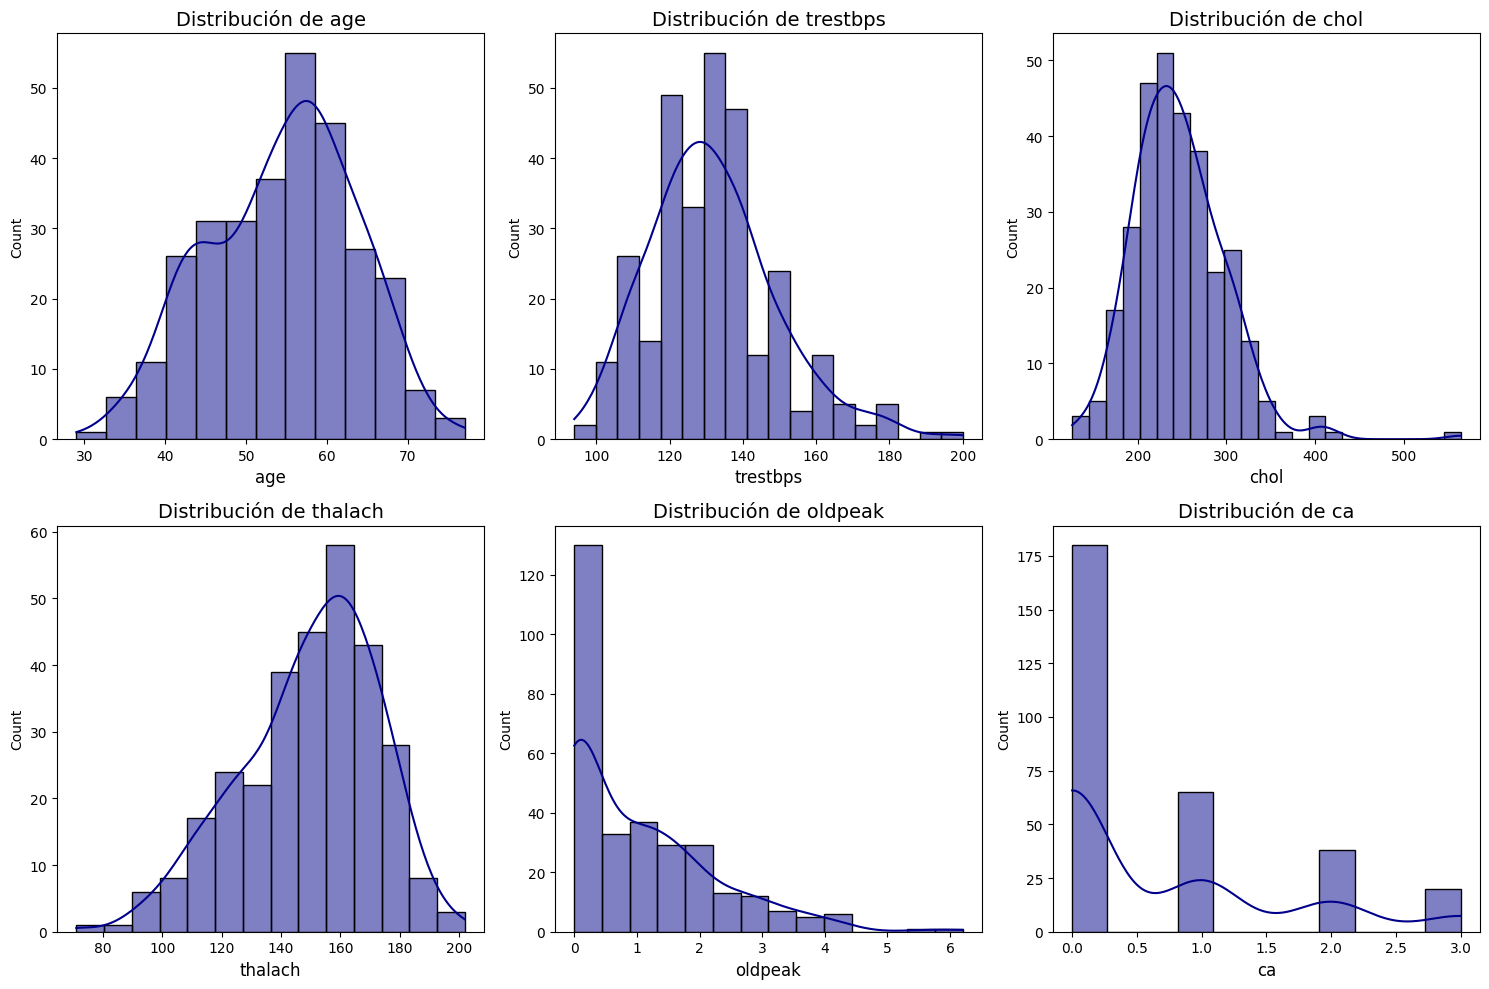

In [ ]:
# Se observan las distribuciones de algunas de las variables de interés
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Graficos con su línea de distribuación
for i, var in enumerate(variables_of_interest):
    sns.histplot(df[var], kde=True, color='darkblue', ax=axs[i//3, i%3])
    axs[i//3, i%3].set_title(f'Distribución de {var}', fontsize=14)
    axs[i//3, i%3].set_xlabel(var, fontsize=12)

plt.tight_layout()
plt.show()


Datos escalados
         age  sex        cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.948726  1.0 -2.251775  0.757525 -0.264900  1.0      2.0  0.017197    0.0   
1  1.392002  1.0  0.877985  1.611220  0.760415  0.0      2.0 -1.821905    1.0   
2  1.392002  1.0  0.877985 -0.665300 -0.342283  0.0      2.0 -0.902354    1.0   
3 -1.932564  1.0 -0.165268 -0.096170  0.063974  0.0      0.0  1.637359    0.0   
4 -1.489288  0.0 -1.208521 -0.096170 -0.825922  0.0      2.0  0.980537    0.0   

    oldpeak     slope        ca      thal  num  diagnostico  
0  1.087338  2.274579 -0.711131  0.660004    0            0  
1  0.397182  0.649113  2.504881 -0.890238    2            1  
2  1.346147  0.649113  1.432877  1.176752    1            1  
3  2.122573  2.274579 -0.711131 -0.890238    0            0  
4  0.310912 -0.976352 -0.711131 -0.890238    0            0  


<Axes: xlabel='chol', ylabel='Count'>

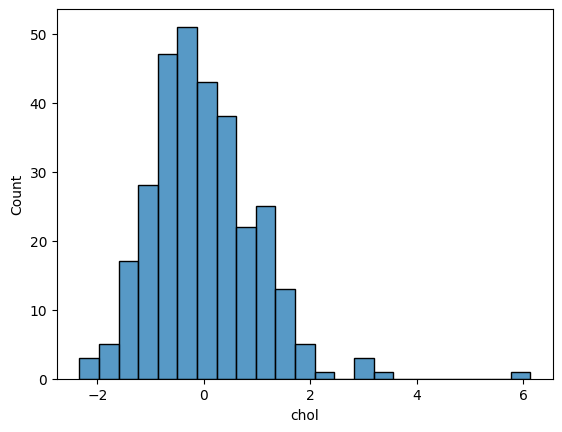

In [ ]:
# Para realizar la selección de variables es necesario realizar un procesado previo
'''Debido a que hay datos que muestran magnitudes diferentes se realziará
un rescalado de los datos'''

# Se realiza el reescalado de los datos (sklearn)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Se separan las variables no binarias para escalarlas
variables_a_escalar = ['age', 'chol','trestbps','thalach','oldpeak','thal','slope',
                       'cp','ca']

# Se crea el "objeto" StandardScaler
scaler = StandardScaler()

# Se ajustan las variables en un nuevo df
df_scaled = pd.DataFrame(df_bi)
df_scaled[variables_a_escalar] = scaler.fit_transform(df_scaled[variables_a_escalar])

# Finalmente mostramos el resultado final por pantalla
print("\nDatos escalados\n", df_scaled[0:5])
sns.histplot(df_scaled['chol'])

In [ ]:
# A continuación se observará la correlación entre las diferentes variables
# Se divide el dataset separando la variable objetivo del resto
df_data= df_bi.drop(['num','diagnostico'], axis=1)
print ("\n Dataframe dividido sin la variable objetivo \n")
print (df_data)

# Para tener otra perspectiva de la relación de las variables se realiza un VIF
# Se cargan las librerías
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Se calcula el VIF para cada variable
def calculate_vif(df_data):
    vif_data = pd.DataFrame()
    vif_data["Variables"] = df_data.columns
    vif_data["VIF"] = [variance_inflation_factor(df_data.values, i) for i in range(df_data.shape[1])]
    return vif_data

# Usa la función para calcular VIF en lugar de la matriz de correlación
vif_data_pre = calculate_vif(df_data)
print ("\n Resultado del VIF \n")
print(vif_data_pre)


 Dataframe dividido sin la variable objetivo 

          age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
0    0.948726  1.0 -2.251775  0.757525 -0.264900  1.0      2.0  0.017197   
1    1.392002  1.0  0.877985  1.611220  0.760415  0.0      2.0 -1.821905   
2    1.392002  1.0  0.877985 -0.665300 -0.342283  0.0      2.0 -0.902354   
3   -1.932564  1.0 -0.165268 -0.096170  0.063974  0.0      0.0  1.637359   
4   -1.489288  0.0 -1.208521 -0.096170 -0.825922  0.0      2.0  0.980537   
..        ...  ...       ...       ...       ...  ...      ...       ...   
298 -1.046013  1.0 -2.251775 -1.234430  0.334813  0.0      0.0 -0.770990   
299  1.502821  1.0  0.877985  0.700612 -1.038723  1.0      0.0 -0.376896   
300  0.283813  1.0  0.877985 -0.096170 -2.238149  0.0      0.0 -1.515388   
301  0.283813  0.0 -1.208521 -0.096170 -0.206864  0.0      2.0  1.068113   
302 -1.821745  1.0 -0.165268  0.359134 -1.386944  0.0      0.0  1.024325   

     exang   oldpeak     slope        c

In [ ]:
# Se representan gráficamente los resultados de las variables
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Gráfico de barras VIF con etiquetas al pasar el cursor
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Bar(x=vif_data_pre['Variables'], y=vif_data_pre['VIF'], marker=dict(color='darkred'),
                     hovertemplate='VIF: %{y}', name='VIF'), row=1, col=1)

fig.update_layout(showlegend=True, title_text="Valores de VIF para cada variable", height=800)
fig.show()

In [ ]:
'''Se comienza el desarrollo de los modelos. En primer lugar se entrena mediante
árboles de decisión, que no necesitan el escalado de los datos'''

# A continuación se crean los grupos de entrenamiento
df_tree= df_bi.drop(['num','diagnostico'], axis=1)
print ("\n Dataframe dividido sin la variable objetivo \n")
print (df_tree)
# Grupo de entrenamiento y Grupo de validación
from sklearn.model_selection import train_test_split
y = df_bi['diagnostico']
X = df_tree[df_tree.columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

# Se observa la forma de estos grupos
print(" - X_train:", X_train.shape)
print(" - X_test:", X_test.shape)
print(" - y_train:", y_train.shape)
print(" - y_test:", y_test.shape)


 Dataframe dividido sin la variable objetivo 

          age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
0    0.948726  1.0 -2.251775  0.757525 -0.264900  1.0      2.0  0.017197   
1    1.392002  1.0  0.877985  1.611220  0.760415  0.0      2.0 -1.821905   
2    1.392002  1.0  0.877985 -0.665300 -0.342283  0.0      2.0 -0.902354   
3   -1.932564  1.0 -0.165268 -0.096170  0.063974  0.0      0.0  1.637359   
4   -1.489288  0.0 -1.208521 -0.096170 -0.825922  0.0      2.0  0.980537   
..        ...  ...       ...       ...       ...  ...      ...       ...   
298 -1.046013  1.0 -2.251775 -1.234430  0.334813  0.0      0.0 -0.770990   
299  1.502821  1.0  0.877985  0.700612 -1.038723  1.0      0.0 -0.376896   
300  0.283813  1.0  0.877985 -0.096170 -2.238149  0.0      0.0 -1.515388   
301  0.283813  0.0 -1.208521 -0.096170 -0.206864  0.0      2.0  1.068113   
302 -1.821745  1.0 -0.165268  0.359134 -1.386944  0.0      0.0  1.024325   

     exang   oldpeak     slope        c

In [ ]:
# Se procede a los pasos para el entrenamiento del primer modelo
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Primero se comprobarán los mejores parámetros para el modelo
# Se definen los valores que queremos probar para max_depth
param_grid = {'max_depth': range(1, 10)}

# Se crea un clasicficador para el árbol (con criterio gini)
dt_clf = DecisionTreeClassifier(criterion='gini')

# Se ejecuta la búsqueda y se observan los resultados
dt_grid_search = GridSearchCV(dt_clf, param_grid, cv=5)
dt_grid_search.fit(X_train, y_train)
print("Mejor valor de max_depth:", dt_grid_search.best_params_['max_depth'])
print("Exactitud del mejor modelo encontrado:", dt_grid_search.best_score_)

Mejor valor de max_depth: 3
Exactitud del mejor modelo encontrado: 0.8306122448979592


La precisión del modelo es de:75.41
Matriz de confusión:
[[25  8]
 [ 7 21]]


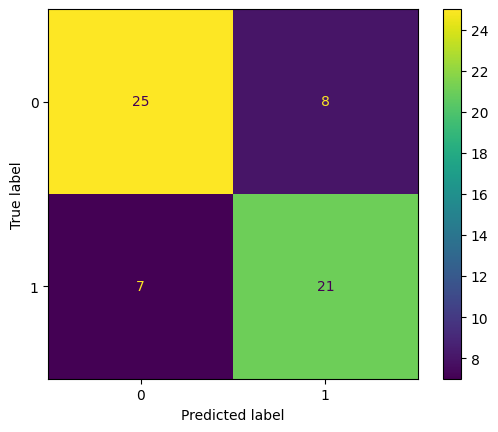

In [ ]:
# El modelo usado al ser una variable binaria será árbol de decisión
# Se le aplica el valor de profundidad estudiado
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(criterion='gini', max_depth=3)
clf_dt.fit(X_train, y_train)
# Ajustado el modelo vamos a evaluar su desempeño
# Calculamos las predicciones del modelo entrenado sobre el conjunto de prueba
y_test_pred = clf_dt.predict(X_test)
# Utilizando las etiquetas verdaderas en el conjunto de prueba, calculamos la
# precisión del modelo
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_test_pred) * 100
print("La precisión del modelo es de:{:0.2f}".format(acc))

# Se realiza una matriz de confusión para ver el desempeño del modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_mtx = confusion_matrix(y_test, y_test_pred)
print("Matriz de confusión:")
print(confusion_mtx)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)

In [ ]:
# A continuación se crean los grupos de entrenamiento
# Grupo de entrenamiento y Grupo de validación
from sklearn.model_selection import train_test_split
y = df_bi['diagnostico']
X = df_data[df_data.columns]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 123)

# Se observa la forma de estos grupos
print(" - X_train:", X_train1.shape)
print(" - X_test:", X_test1.shape)
print(" - y_train:", y_train1.shape)
print(" - y_test:", y_test1.shape)

 - X_train: (242, 13)
 - X_test: (61, 13)
 - y_train: (242,)
 - y_test: (61,)


La precisión del modelo (LogReg) es de: 78.69
Matriz de confusión:
[[28  5]
 [ 7 21]]
El área bajo la curva (AUC) es: 0.87


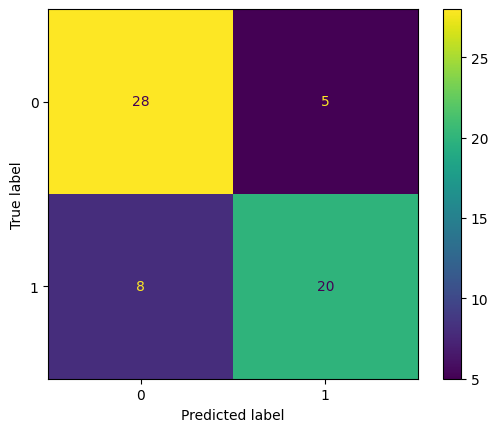

In [ ]:
# Se realiza el entrenamiento del modelo de regresión
from sklearn.linear_model import LogisticRegression
y_train1 = y_train1.astype(int)
clf_lr = LogisticRegression()
clf_lr.fit(X_train1, y_train1)
y_test_pred1 = clf_lr.predict(X_test1)

# Se calcula el porcentaje de precisión del modelo
acc = accuracy_score(y_test1, y_test_pred1) * 100
print("La precisión del modelo (LogReg) es de: {:0.2f}".format(acc))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_mtx = confusion_matrix(y_test, y_test_pred)

# Se realiza de nuevo una matriz de confusión para visualizar la capacidad del modelo
print("Matriz de confusión:")
print(confusion_mtx)
ConfusionMatrixDisplay.from_predictions(y_test1, y_test_pred1)
# Predecir las probabilidades en el conjunto de prueba
y_test_probs1 = clf_lr.predict_proba(X_test1)[:, 1]

# Calcular el AUC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test1, y_test_probs1)
print("El área bajo la curva (AUC) es: {:0.2f}".format(auc))

In [ ]:
# Por último se entrena el último modelo de Máquina de vectores
from sklearn.svm import SVC

# Se crea un clasificador SVM
clf = SVC(kernel='sigmoid')

# Se procede al entrenamiento del modelo
'''No es necesario crear nuevos grupos de entrenamiento para el modelo
al aceptar el mismo tipo de datos que la regresión'''
clf.fit(X_train1, y_train1)


SVC(kernel='sigmoid')

La precisión del modelo SVC es de: 80.33
Matriz de confusión:
[[28  5]
 [ 7 21]]
Matriz de confusión:


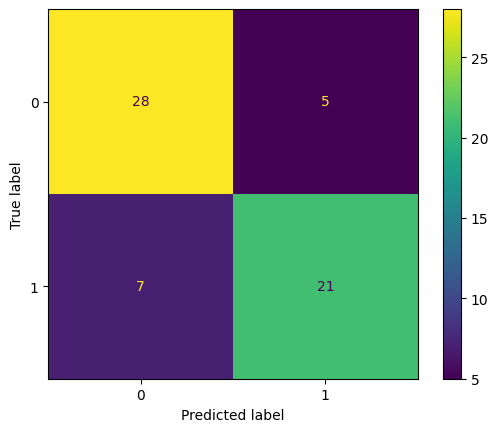

El área bajo la curva (AUC) es: 0.80


In [ ]:
# Realiza predicciones en el conjunto de prueba
y_test_pred2 = clf.predict(X_test1)

# Calcula el porcentaje de precisión del modelo
acc = accuracy_score(y_test1, y_test_pred1) * 100
print("La precisión del modelo SVC es de: {:0.2f}".format(acc))

# Crea la matriz de confusión
confusion_mtx = confusion_matrix(y_test1, y_test_pred2)

# Imprime la matriz de confusión
print("Matriz de confusión:")
print(confusion_mtx)

# Muestra la matriz de confusión
# Se realiza de nuevo una matriz de confusión para visualizar la capacidad del modelo
print("Matriz de confusión:")
ConfusionMatrixDisplay.from_predictions(y_test1, y_test_pred2)
plt.show()


# Calcular el AUC
auc = roc_auc_score(y_test1, y_test_pred2)
print("El área bajo la curva (AUC) es: {:0.2f}".format(auc))